In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

In [2]:
file_path = 'vietnam_macro_economic_by_month.csv'
data = pd.read_csv(file_path)
data.head(), data.columns

(  Thời gian FDI FDI đăng kí (lũy kế năm) FDI giải ngân (lũy kế năm)  \
 0         -   -                    % YoY                      % YoY   
 1   T1 2017   -                       19                        6.3   
 2   T2 2017   -                     21.5                        3.3   
 3   T3 2017   -                     91.5                        3.4   
 4   T4 2017   -                     53.9                        3.2   
 
   Thương mại (lũy kế năm) Xuất khẩu  (lũy kế năm) Nhập khẩu  (lũy kế năm)  \
 0                       -                   % YoY                   % YoY   
 1                       -                       6                     3.2   
 2                       -                    16.5                    23.5   
 3                       -                    15.7                    25.4   
 4                       -                    17.4                    24.8   
 
   Cung tiền & tín dụng Tăng trưởng tín dụng Nông nghiệp  ... Chi thường xuyên  \
 0            

In [3]:
columns = ['Thoi_gian', 'FDI', 'FDI_dang_ki',
       'FDI_giai_ngan', 'Thuong_mai_luy_ke_nam',
       'Xuat_khau_luy_ke_nam', 'Nhap_khau_luy_ke_nam',
       'Cung_tien_va_tin_dung', 'Tang_truong_tin_dung', 'Nong_nghiep',
       'Thuong_mai', 'Cong_nghiep', 'Xay_dung', 'Cung_tien_M2', 'Tai_khoa',
       'Tong_thu', 'Noi_dia', 'Tong_chi', 'Chi_dau_tu_phat_trien',
       'Chi_thuong_xuyen', 'Chi_so_gia', 'Lam_phat_co_ban', 'Lam_phat',
       'Thuc_pham', 'Nha_o_va_VLXD', 'Y_te', 'Van_tai', 'Chi_so_PMI',
       'Tang_truong_GDP_thuc_te']

data.columns = columns

print("Column names after cleaning:", data.columns)

Column names after cleaning: Index(['Thoi_gian', 'FDI', 'FDI_dang_ki', 'FDI_giai_ngan',
       'Thuong_mai_luy_ke_nam', 'Xuat_khau_luy_ke_nam', 'Nhap_khau_luy_ke_nam',
       'Cung_tien_va_tin_dung', 'Tang_truong_tin_dung', 'Nong_nghiep',
       'Thuong_mai', 'Cong_nghiep', 'Xay_dung', 'Cung_tien_M2', 'Tai_khoa',
       'Tong_thu', 'Noi_dia', 'Tong_chi', 'Chi_dau_tu_phat_trien',
       'Chi_thuong_xuyen', 'Chi_so_gia', 'Lam_phat_co_ban', 'Lam_phat',
       'Thuc_pham', 'Nha_o_va_VLXD', 'Y_te', 'Van_tai', 'Chi_so_PMI',
       'Tang_truong_GDP_thuc_te'],
      dtype='object')


In [4]:
selected_columns = ['Thoi_gian', 'FDI_dang_ki', 'Xuat_khau_luy_ke_nam', 'Nhap_khau_luy_ke_nam', 'Tang_truong_tin_dung', 'Cung_tien_M2', 'Lam_phat', 'Tang_truong_GDP_thuc_te']

data = data[selected_columns]

# Drop hàng thứ 2 (hàng chứa thông tin về đơn vị)
data = data.drop(0)

data.head()
data.shape

(84, 8)

In [5]:
def convert_date(date_str):
    month_map = {
        'T1': '01', 'T2': '02', 'T3': '03', 'T4': '04', 'T5': '05',
        'T6': '06', 'T7': '07', 'T8': '08', 'T9': '09', 'T10': '10',
        'T11': '11', 'T12': '12'
    }
    month, year = date_str.split()
    month = month_map[month]
    return pd.to_datetime(f'{year}-{month}-01')


time_column = 'Thoi_gian'
data[time_column] = data[time_column].apply(convert_date)

# Convert 'Thoi_gian' to datetime format and set as index
data[time_column] = pd.to_datetime(data[time_column])
data.set_index(time_column, inplace=True)

data.head()

,FDI_dang_ki,Xuat_khau_luy_ke_nam,Nhap_khau_luy_ke_nam,Tang_truong_tin_dung,Cung_tien_M2,Lam_phat,Tang_truong_GDP_thuc_te
Thoi_gian,,,,,,,
2017-01-01,19,6,3.2,19.5,19.7,5.2,5.2
2017-02-01,21.5,16.5,23.5,19.6,18.1,5,5.2
2017-03-01,91.5,15.7,25.4,21.6,17.7,4.7,5.2
2017-04-01,53.9,17.4,24.8,20.6,17,4.3,6.4
2017-05-01,19.4,19,25.3,22,16.2,3.2,6.4


In [6]:
xuat_khau = 'Xuat_khau_luy_ke_nam'
nhap_khau = 'Nhap_khau_luy_ke_nam'

print("Null values in 'Xuat_khau':", data[xuat_khau].isnull().sum())
print("Null values in 'Nhap_khau':", data[nhap_khau].isnull().sum())

Null values in 'Xuat_khau': 5
Null values in 'Nhap_khau': 2


In [7]:
# xử lí những giá trị null trong cột xuất khẩu và nhập khẩu bằng nội suy tuyến tính
data[xuat_khau] = data[xuat_khau].replace({None: np.nan, '': np.nan})
data[nhap_khau] = data[nhap_khau].replace({None: np.nan, '': np.nan})

# Convert columns to numeric
data[xuat_khau] = pd.to_numeric(data[xuat_khau], errors='coerce')
data[nhap_khau] = pd.to_numeric(data[nhap_khau], errors='coerce')

data[xuat_khau] = data[xuat_khau].interpolate(method='linear')
data[nhap_khau] = data[nhap_khau].interpolate(method='linear')

missing_values = data.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [8]:
# data.to_csv('output.csv')

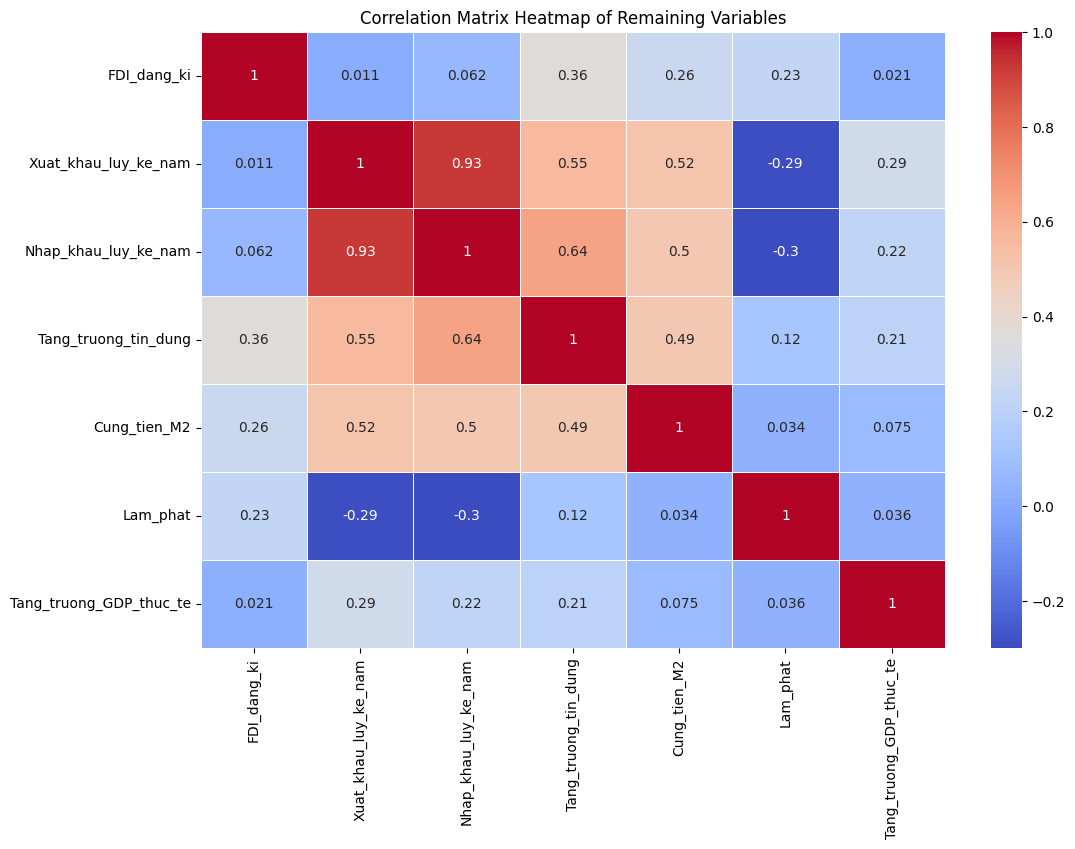

In [9]:
corr_matrix = data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Remaining Variables')
plt.show()

In [10]:
columns_to_drop = ['Nhap_khau_luy_ke_nam']

data = data.drop(columns=columns_to_drop)

In [11]:
# Hàm kiểm tra và chuyển đổi dữ liệu thành dạng dừng (stationary)
def make_stationary(df):
    df_stationary = df.copy()
    for column in df.columns:
        p_value = adfuller(df[column].dropna())[1]  # Ensure dropna() for ADF test
        if p_value > 0.05:
            df_stationary[column] = df[column].diff().dropna()
        else:
            df_stationary[column] = df[column]
    return df_stationary.dropna()

# Đảm bảo kiểu dữ liệu nhất quán
data = data.astype(float)

# Thay thế các giá trị bằng 0 hoặc âm bằng NaN để tránh lỗi logarit
data = data.replace(0, np.nan)
data = data.applymap(lambda x: x if x > 0 else np.nan)
data = data.fillna(method='bfill').fillna(method='ffill')

# Biến đổi logarit dữ liệu
data_log = np.log(data)

# Kiểm tra và chuyển đổi dữ liệu thành dạng dừng
data_stationary = make_stationary(data_log)


C:\Users\THANH TUYEN\AppData\Local\Temp\ipykernel_12068\512518088.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x if x > 0 else np.nan)
C:\Users\THANH TUYEN\AppData\Local\Temp\ipykernel_12068\512518088.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill').fillna(method='ffill')


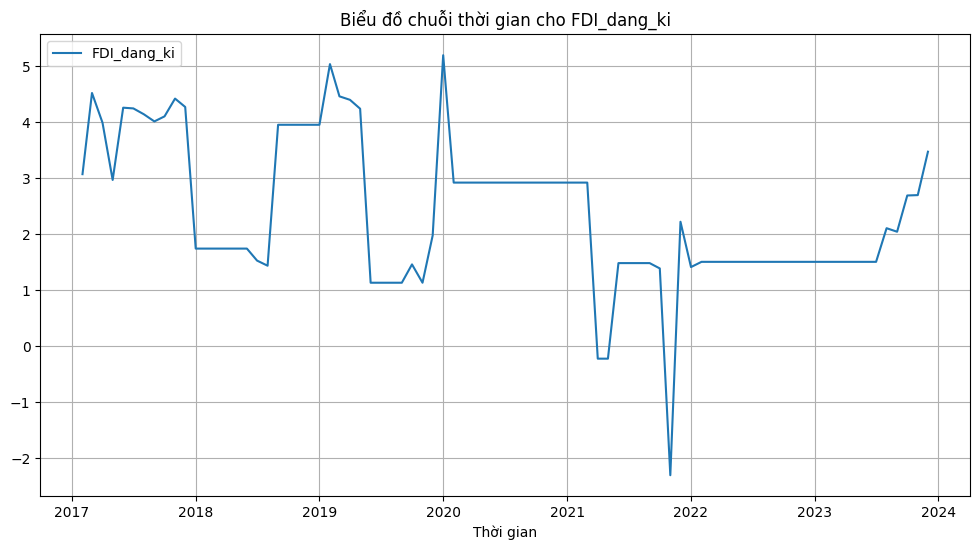

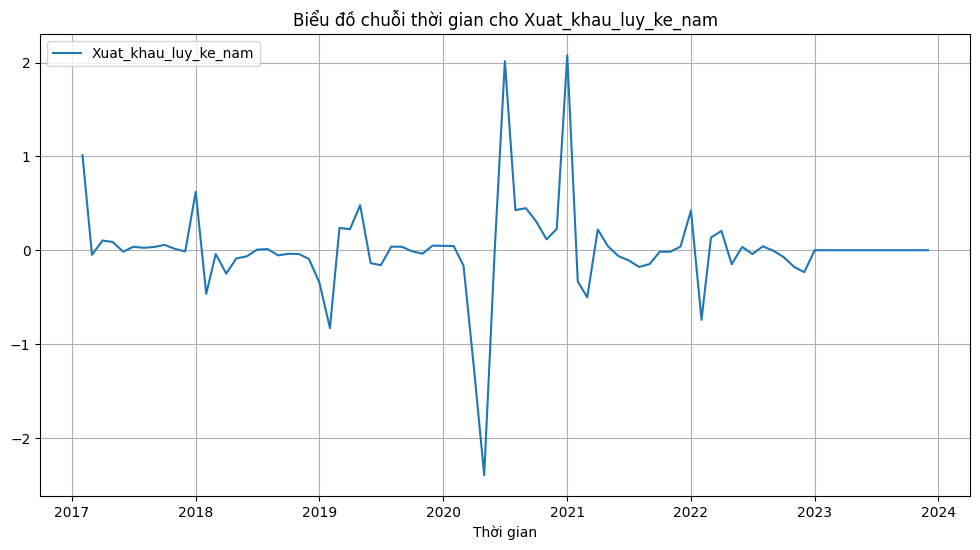

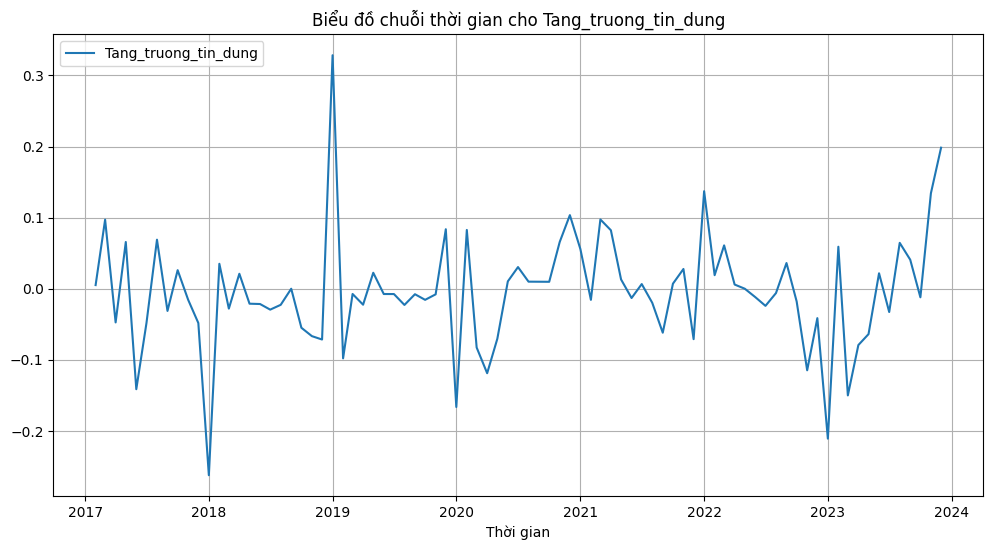

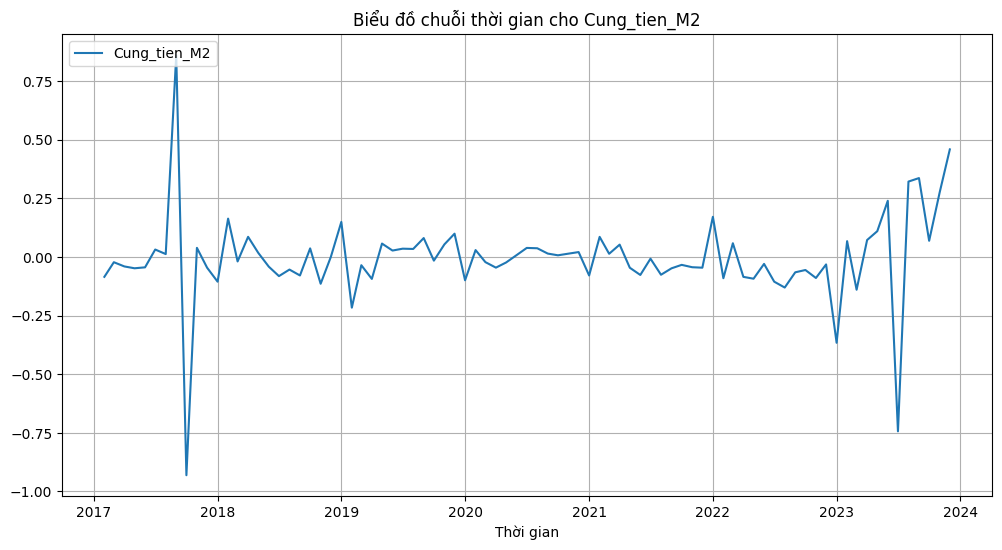

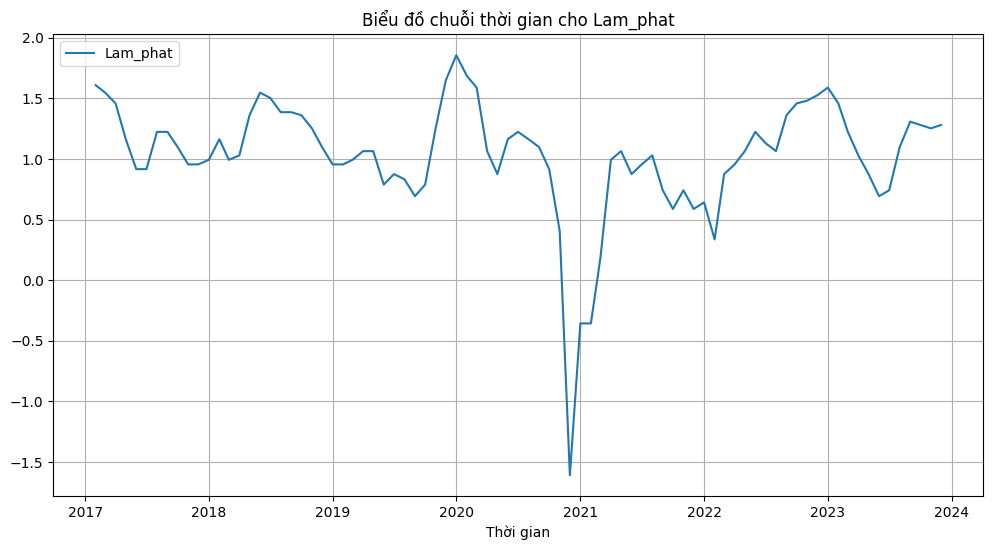

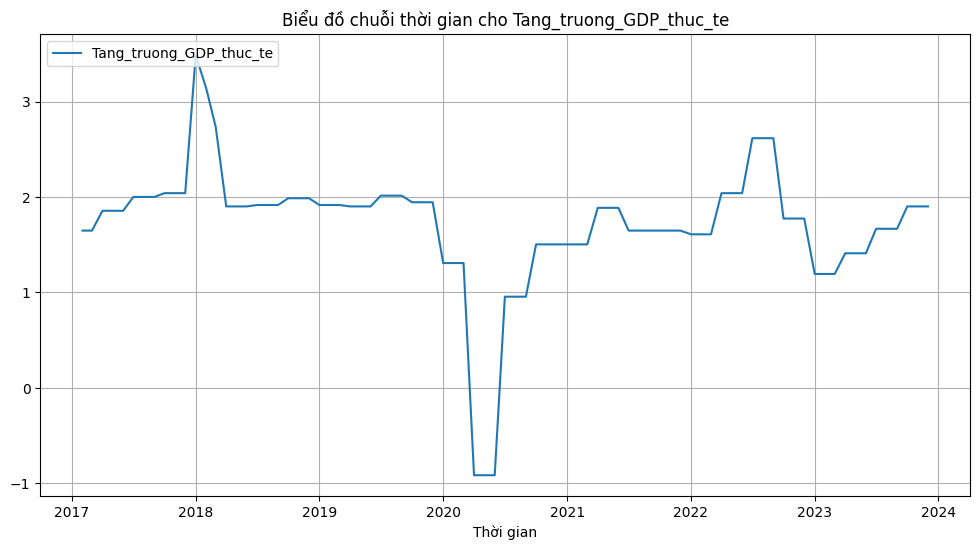

In [12]:
# Lấy tất cả các cột trừ 'Thoi_gian' (vì nó là index)
columns_to_plot = data_stationary.columns

# Vẽ mỗi chuỗi thời gian trong một hình riêng biệt
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(data_stationary.index, data_stationary[column], label=column)
    plt.xlabel('Thời gian')
    # plt.ylabel('Giá trị')
    plt.title(f'Biểu đồ chuỗi thời gian cho {column}')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [13]:
# Split data into training and testing sets
train_data = data_stationary['2017-01-01':'2022-12-01']
test_data = data_stationary['2023-01-01':'2023-12-01']

# Check if training and testing sets are not empty
if train_data.empty or test_data.empty:
    raise ValueError("The training or testing data is empty after splitting. Please check the date ranges.")

# Standardize the data (important for VAR models)
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Convert scaled data back to DataFrame for VAR
train_data_scaled = pd.DataFrame(train_data_scaled, index=train_data.index, columns=train_data.columns)
test_data_scaled = pd.DataFrame(test_data_scaled, index=test_data.index, columns=test_data.columns)

In [14]:
# Training the VAR model with hyperparameter tuning
best_aic = float('inf')
best_order = None
best_model = None

for i in range(1, 8):  # Test lags from 1 to 7
    model = VAR(train_data_scaled)
    result = model.fit(i)

    if result.aic < best_aic:
        best_aic = result.aic
        best_order = i
        best_model = result

print(f'Best AIC: {best_aic}')
print(f'Best order: {best_order}')

# Summary of the best model
print(best_model.summary())


Best AIC: -2.2951741797486225
Best order: 1
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, May, 2024
Time:                     23:50:30
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                  -0.946077
Nobs:                     70.0000    HQIC:                  -1.75930
Log likelihood:          -473.623    FPE:                   0.101150
AIC:                     -2.29517    Det(Omega_mle):       0.0570966
--------------------------------------------------------------------
Results for equation FDI_dang_ki
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.011437         0.092274           -0.124           0.901
L1.FDI_dang_ki                     0.646811         

c:\Users\THANH TUYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\THANH TUYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\THANH TUYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\THANH TUYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\THANH TUYEN\AppData\Loc

Mean Squared Error: 11.371514470874219


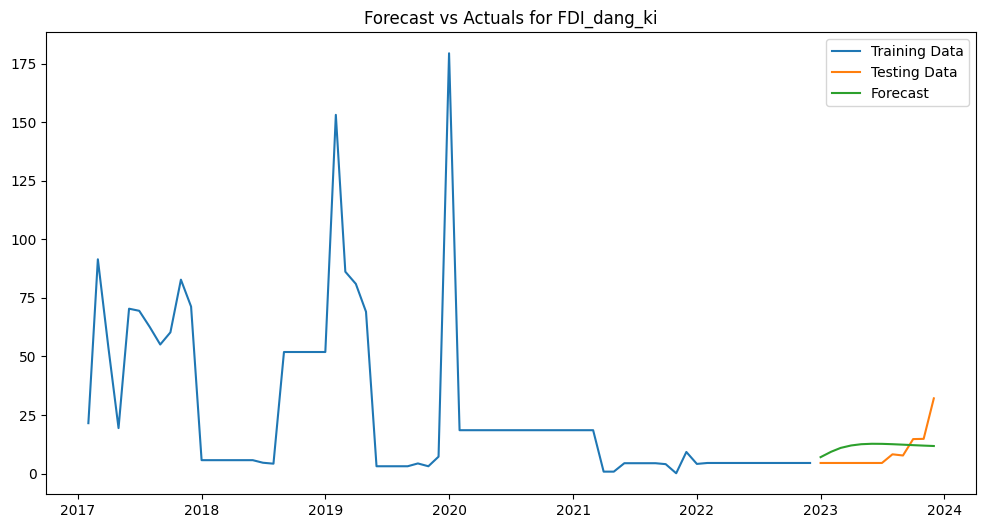

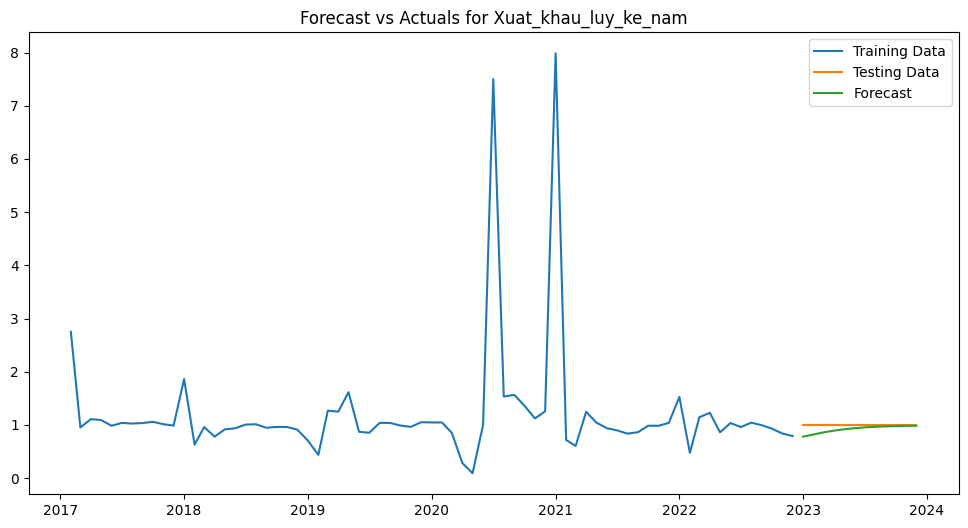

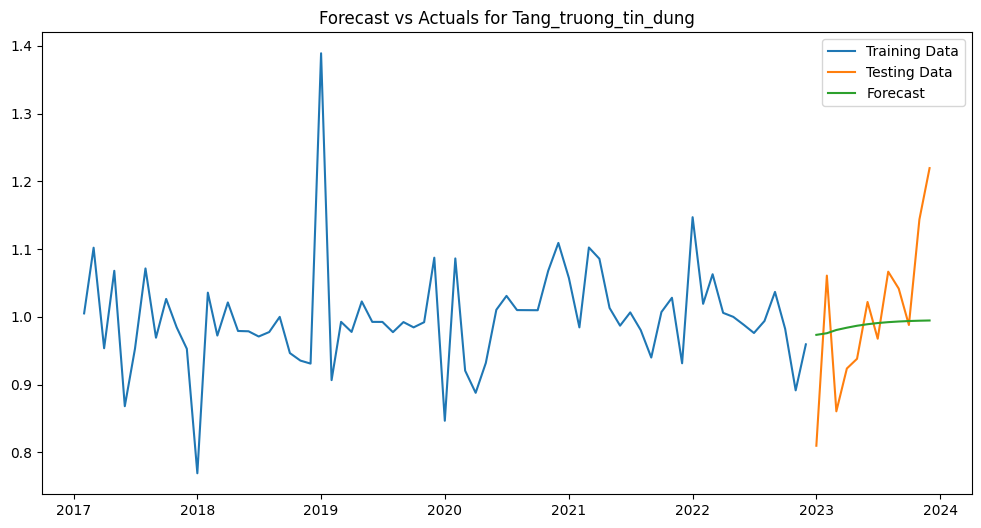

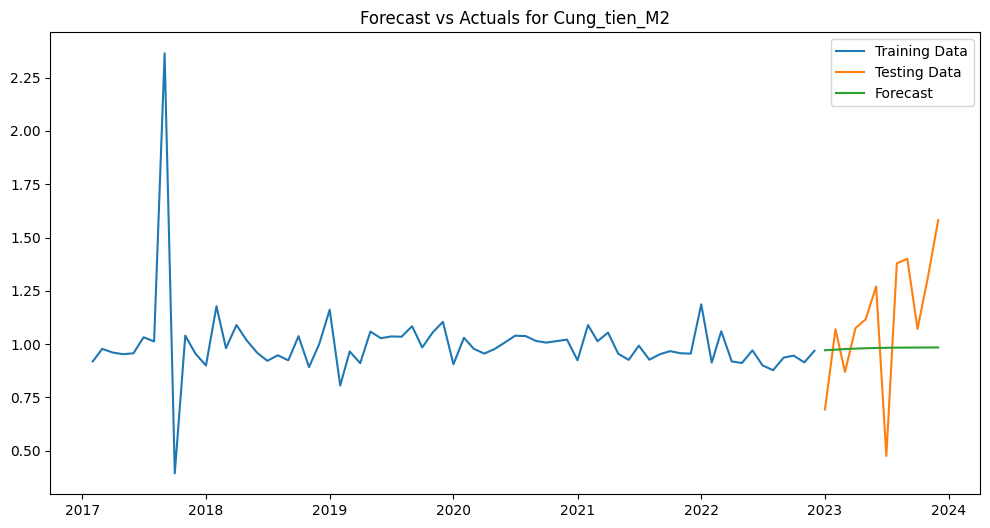

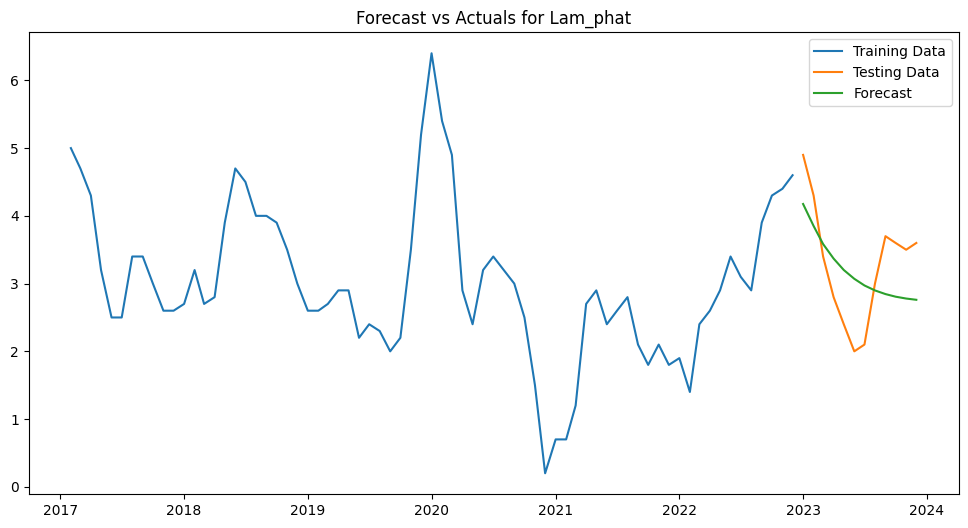

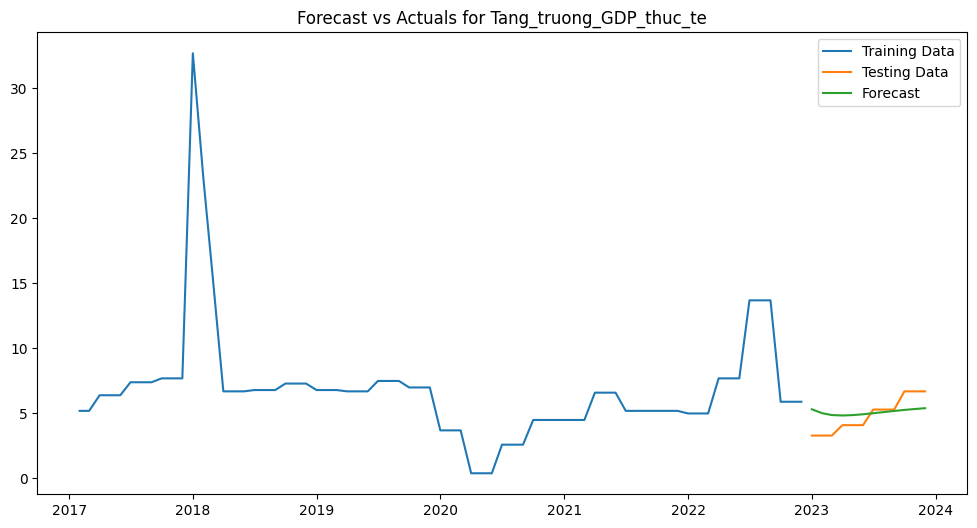

In [15]:
# Forecasting
forecast_steps = len(test_data_scaled)
forecast = best_model.forecast(train_data_scaled.values[-best_order:], steps=forecast_steps)
forecast = scaler.inverse_transform(forecast)  # Inverse transform to original scale

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Reverse log transformation
forecast_df = np.exp(forecast_df)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(np.exp(test_data), forecast_df)
print(f'Mean Squared Error: {mse}')

# Optionally: Plot the results
for column in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, np.exp(train_data[column]), label='Training Data')
    plt.plot(test_data.index, np.exp(test_data[column]), label='Testing Data')
    plt.plot(forecast_df.index, forecast_df[column], label='Forecast')
    plt.title(f'Forecast vs Actuals for {column}')
    plt.legend()
    plt.show()

In [16]:
# Đặt số bước dự báo cho 12 tháng tiếp theo
forecast_steps_next_12_months = 12

# Dự báo cho 12 tháng tiếp theo
forecast_next_12_months = best_model.forecast(train_data_scaled.values[-best_order:], steps=forecast_steps_next_12_months)
forecast_next_12_months = scaler.inverse_transform(forecast_next_12_months)  # Chuyển về tỷ lệ ban đầu

# Chuyển dự báo sang DataFrame
forecast_next_12_months_df = pd.DataFrame(forecast_next_12_months, columns=test_data.columns)

# Đảo ngược biến đổi log
forecast_next_12_months_df = np.exp(forecast_next_12_months_df)

# Hiển thị dự báo cho 12 tháng tiếp theo
print("Forecast for the next 12 months:")
forecast_next_12_months_df


Forecast for the next 12 months:


,FDI_dang_ki,Xuat_khau_luy_ke_nam,Tang_truong_tin_dung,Cung_tien_M2,Lam_phat,Tang_truong_GDP_thuc_te
0,6.990935,0.779166,0.973463,0.971310,4.175094,5.320419
1,9.288886,0.820108,0.975863,0.973802,3.850463,5.016511
2,10.931261,0.858504,0.980641,0.977083,3.583831,4.878436
3,11.979015,0.891195,0.984023,0.978954,3.369246,4.844726
4,12.517008,0.917405,0.986897,0.980717,3.200715,4.873154
5,12.701835,0.937824,0.989146,0.981863,3.070866,4.937117
6,12.668806,0.953306,0.990882,0.982762,2.972482,5.018872
7,12.519133,0.964714,0.992193,0.983362,2.899122,5.106614
8,12.320172,0.972884,0.993157,0.983782,2.845344,5.192708
9,12.112385,0.978546,0.993849,0.984050,2.806671,5.272488
